# Regression Models in R (tips)

In [1]:
if(!exists("Table1", mode="function")) source("mechkar.R")

In [2]:

library(readr)
library(dplyr)
library(ggplot2)


Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [3]:
df <- read.csv("train.csv")
head(df)
dim(df)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


[1] 365  12

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# EDA

In [4]:
df$holiday <- as.factor(df$holiday)
df$season <- as.factor(df$season)
df$mnth <- as.factor(df$mnth)
df$workingday <- as.factor(df$workingday)
df$weathersit <- as.factor(df$weathersit)
df$weekday <- as.factor(df$weekday)
summary(df)

       id      season      mnth     holiday weekday workingday weathersit
 Min.   :  1   1:90   1      : 31   0:355   0:52    0:115      1:226     
 1st Qu.: 92   2:92   3      : 31   1: 10   1:52    1:250      2:124     
 Median :183   3:94   5      : 31           2:52               3: 15     
 Mean   :183   4:89   7      : 31           3:52                         
 3rd Qu.:274          8      : 31           4:52                         
 Max.   :365          10     : 31           5:52                         
                      (Other):179           6:53                         
      temp             atemp              hum           windspeed      
 Min.   :0.05913   Min.   :0.07907   Min.   :0.0000   Min.   :0.02239  
 1st Qu.:0.32500   1st Qu.:0.32195   1st Qu.:0.5383   1st Qu.:0.13558  
 Median :0.47917   Median :0.47285   Median :0.6475   Median :0.18690  
 Mean   :0.48666   Mean   :0.46684   Mean   :0.6437   Mean   :0.19140  
 3rd Qu.:0.65667   3rd Qu.:0.61238   3rd Qu.:0.7

# DATASET PARTITION

In [5]:
tab1 <- train_test(data=df, train_name="train", test_name="test", prop=0.7, seed=5, tableone=TRUE)
tab1

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


  |===========================                                           |  38%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |=================================================================     |  92%

 

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),183.7 (105.0),181.4 (107.2),NA
id,Median (IQR),183.0 (92.0-274.0),181.0 (92.5-272.5),184.5 (88.0-277.0),0.854
season,1,90 (24.7%),62 (24.3%),28 (25.5%),NA
season,2,92 (25.2%),67 (26.3%),25 (22.7%),0.914
season,3,94 (25.8%),65 (25.5%),29 (26.4%),NA
season,4,89 (24.4%),61 (23.9%),28 (25.5%),NA
mnth,1,31 (8.5%),20 (7.8%),11 (10.0%),NA
mnth,2,28 (7.7%),18 (7.1%),10 (9.1%),0.841


In [6]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [7]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


## XGBoost

In [8]:
#install.packages("xgboost")
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 4.0.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [9]:
cnames = names(train)
cnames <- cnames[c(2:11)]

variables_comb <- list()

# length(combn(cnames,3))
# combn(cnames,3)

counter <-  0
for(i in 1:10) {
    curr_combs <- combn(cnames,i)
    for(j in 1:(length(curr_combs)/i)){
        counter <- counter + 1
        curr_comb <- data.frame(curr_combs[,j])
        variables_comb[counter] <- curr_comb
    }
} 

In [10]:
# install.packages("svMisc")
require(svMisc)

Loading required package: svMisc

Warning message:
"package 'svMisc' was built under R version 4.0.3"

Attaching package: 'svMisc'


The following object is masked from 'package:utils':

    ?




In [25]:

err_res <- NULL
counter <- 0
for(curr_vars in variables_comb){
    
    counter <- counter + 1
    progress(counter * 100 / 1023)
    
    print(curr_vars)
    
    outcome <- "cnt"
    variables <- curr_vars
    f <- as.formula( paste(outcome,  paste(variables, collapse = " + "), sep = " ~ "))
    
    train1 <- Matrix::sparse.model.matrix(f, data = train)
    test1 <- Matrix::sparse.model.matrix(f, data = test)
    
    #X_train <- xgb.DMatrix(train1)
    X_train <- train1
    y_train <- train$cnt
    mod7 <- xgboost(data=X_train,label=y_train, nrounds=1000,max_depth = 15,print_every_n = 100, early_stopping_rounds=10)
    #X_test <- xgb.DMatrix(test1)
    X_test <- test1
    y_test <- test$cnt

    pred7 <- predict(mod7,newdata=X_test)
    rmse(y_test,pred7)
    rmsle(y_test,pred7)
    err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                         RMSE=rmse(test$cnt,pred7), 
                                         RMSLE=rmsle(test$cnt,pred7)))
}



Progress:   0%  [1] "season"
[1]	train-rmse:2681.926025 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[28]	train-rmse:877.957703

Progress:   0%  [1] "mnth"
[1]	train-rmse:2724.260498 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[32]	train-rmse:723.283142

Progress:   0%  [1] "holiday"
[1]	train-rmse:2771.290283 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[26]	train-rmse:1360.755615

Progress:   0%  [1] "weekday"
[1]	train-rmse:2771.290283 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[33]	train-rmse:1357.937744

Progress:   0%  [1] "workingday"
[1]	train-rmse:2771.290283 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[27]	train-rmse:1360.642822

Progress:   1%  [1] "weathersit"
[1]	train-rmse:2756.168701 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteratio

Progress:   4%  [1] "workingday" "temp"      
[1]	train-rmse:2665.112305 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:221.000641 
Stopping. Best iteration:
[128]	train-rmse:221.000305

Progress:   4%  [1] "workingday" "atemp"     
[1]	train-rmse:2665.739258 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:44.724991 
[201]	train-rmse:44.685089 
Stopping. Best iteration:
[206]	train-rmse:44.685085

Progress:   4%  [1] "workingday" "hum"       
[1]	train-rmse:2761.689453 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:194.618942 
Stopping. Best iteration:
[187]	train-rmse:194.585892

Progress:   4%  [1] "workingday" "windspeed" 
[1]	train-rmse:2757.628662 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:177.512894 
[201]	train-rmse:177.427353 
Stopping. Best iteration:
[199]	train-rmse:177.427353

Progress:   4%  [1] "weathersit" "temp"      
[1]	train-rmse:2657.189209 
Wil

Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:   5%  [1] "temp"  "atemp"
[1]	train-rmse:2664.469727 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.204103 
Stopping. Best iteration:
[180]	train-rmse:0.001761

Progress:   5%  [1] "temp" "hum" 
[1]	train-rmse:2656.319580 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000916 
Stopping. Best iteration:
[94]	train-rmse:0.000915

Progress:   5%  [1] "temp"      "windspeed"
[1]	train-rmse:2660.793213 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.024841 
Stopping. Best iteration:
[137]	train-rmse:0.001378

Progress:   5%  [1] "atemp" "hum"  
[1]	train-rmse:2655.667236 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001660 
Stopping. Best iteration:
[104]	train-rmse:0.001212

Progress:   5%  [1] "atemp"     "windspeed"
[1]	train-rmse:2661.622559 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.027074 
Stopping. Best iteration:

Progress:   9%  [1] "season" "atemp"  "hum"   
[1]	train-rmse:2642.275635 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001115 
Stopping. Best iteration:
[93]	train-rmse:0.001114

Progress:   9%  [1] "season"    "atemp"     "windspeed"
[1]	train-rmse:2648.566650 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001033 
Stopping. Best iteration:
[117]	train-rmse:0.000990

Progress:   9%  [1] "season"    "hum"       "windspeed"
[1]	train-rmse:2671.005859 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000924 
Stopping. Best iteration:
[96]	train-rmse:0.000922

Progress:   9%  [1] "mnth"    "holiday" "weekday"
[1]	train-rmse:2724.260742 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[60]	train-rmse:588.537354

Progress:   9%  [1] "mnth"       "holiday"    "workingday"
[1]	train-rmse:2724.260498 
Will train until train_rmse hasn't improved in 10 rounds.

Stopp

Progress:  12%  [1] "holiday"    "workingday" "temp"      
[1]	train-rmse:2664.688965 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:221.001022 
Stopping. Best iteration:
[126]	train-rmse:221.000320

Progress:  13%  [1] "holiday"    "workingday" "atemp"     
[1]	train-rmse:2665.574463 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:44.837395 
[201]	train-rmse:44.685188 
Stopping. Best iteration:
[245]	train-rmse:44.685089

Progress:  13%  [1] "holiday"    "workingday" "hum"       
[1]	train-rmse:2761.689453 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:194.640732 
[201]	train-rmse:194.585892 
Stopping. Best iteration:
[191]	train-rmse:194.585892

Progress:  13%  [1] "holiday"    "workingday" "windspeed" 
[1]	train-rmse:2757.321777 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:177.495071 
Stopping. Best iteration:
[189]	train-rmse:177.427353

Progress:  13%  [1] "holi

Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  13%  [1] "holiday" "temp"    "atemp"  
[1]	train-rmse:2664.469727 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.576469 
[201]	train-rmse:0.002154 
Stopping. Best iteration:
[197]	train-rmse:0.002154

Progress:  13%  [1] "holiday" "temp"    "hum"    
[1]	train-rmse:2655.749023 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.004179 
Stopping. Best iteration:
[116]	train-rmse:0.001298

Progress:  13%  [1] "holiday"   "temp"      "windspeed"
[1]	train-rmse:2660.391846 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.034641 
Stopping. Best iteration:
[132]	train-rmse:0.001953

Progress:  13%  [1] "holiday" "atemp"   "hum"    
[1]	train-rmse:2655.501953 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001471 
Stopping. Best iteration:
[102]	train-rmse:0.001300

Progress:  14%  [1] "holiday"   "atemp"     "windspeed"
[1]	train-rmse:2661.275635 
Will train unti

Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  16%  [1] "workingday" "temp"       "atemp"     
[1]	train-rmse:2664.469727 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.214848 
Stopping. Best iteration:
[176]	train-rmse:0.002112

Progress:  16%  [1] "workingday" "temp"       "hum"       
[1]	train-rmse:2656.319824 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001826 
Stopping. Best iteration:
[104]	train-rmse:0.001360

Progress:  16%  [1] "workingday" "temp"       "windspeed" 
[1]	train-rmse:2660.793213 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001168 
Stopping. Best iteration:
[97]	train-rmse:0.001168

Progress:  16%  [1] "workingday" "atemp"      "hum"       
[1]	train-rmse:2655.667236 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001315 
Stopping. Best iteration:
[103]	train-rmse:0.001081

Progress:  16%  [1] "workingday" "atemp"      "windspeed" 
[1]	train-rmse:2661.622803 
Will train

Progress:  19%  [1] "season"     "mnth"       "weathersit" "windspeed" 
[1]	train-rmse:2656.802490 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001443 
Stopping. Best iteration:
[102]	train-rmse:0.001435

Progress:  19%  [1] "season" "mnth"   "temp"   "atemp" 
[1]	train-rmse:2650.354492 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.027733 
Stopping. Best iteration:
[137]	train-rmse:0.001384

Progress:  19%  [1] "season" "mnth"   "temp"   "hum"   
[1]	train-rmse:2643.939941 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000925 
Stopping. Best iteration:
[112]	train-rmse:0.000913

Progress:  20%  [1] "season"    "mnth"      "temp"      "windspeed"
[1]	train-rmse:2648.987061 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000937 
Stopping. Best iteration:
[91]	train-rmse:0.000937

Progress:  20%  [1] "season" "mnth"   "atemp"  "hum"   
[1]	train-rmse:2642.27563

Progress:  23%  [1] "season"     "weekday"    "weathersit" "windspeed" 
[1]	train-rmse:2668.634033 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.004389 
Stopping. Best iteration:
[111]	train-rmse:0.001314

Progress:  23%  [1] "season"  "weekday" "temp"    "atemp"  
[1]	train-rmse:2650.354492 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.005602 
Stopping. Best iteration:
[112]	train-rmse:0.001662

Progress:  23%  [1] "season"  "weekday" "temp"    "hum"    
[1]	train-rmse:2643.940186 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[87]	train-rmse:0.000866

Progress:  23%  [1] "season"    "weekday"   "temp"      "windspeed"
[1]	train-rmse:2648.987061 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000769 
Stopping. Best iteration:
[92]	train-rmse:0.000769

Progress:  23%  [1] "season"  "weekday" "atemp"   "hum"    
[1]	train-rmse:2642.275635 
Will train un

Progress:  26%  [1] "mnth"       "holiday"    "workingday" "hum"       
[1]	train-rmse:2713.998047 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:5.933661 
Stopping. Best iteration:
[127]	train-rmse:5.933620

Progress:  26%  [1] "mnth"       "holiday"    "workingday" "windspeed" 
[1]	train-rmse:2718.650146 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.026282 
Stopping. Best iteration:
[131]	train-rmse:0.001398

Progress:  26%  [1] "mnth"       "holiday"    "weathersit" "temp"      
[1]	train-rmse:2654.320068 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:43.083916 
Stopping. Best iteration:
[147]	train-rmse:43.083000

Progress:  27%  [1] "mnth"       "holiday"    "weathersit" "atemp"     
[1]	train-rmse:2656.054688 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:15.013083 
Stopping. Best iteration:
[184]	train-rmse:15.011173

Progress:  27%  [1] "mnth"       "holida

Progress:  30%  [1] "mnth"       "workingday" "hum"        "windspeed" 
[1]	train-rmse:2711.000977 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000936 
Stopping. Best iteration:
[95]	train-rmse:0.000936

Progress:  30%  [1] "mnth"       "weathersit" "temp"       "atemp"     
[1]	train-rmse:2655.066406 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.013066 
Stopping. Best iteration:
[128]	train-rmse:0.001616

Progress:  30%  [1] "mnth"       "weathersit" "temp"       "hum"       
[1]	train-rmse:2652.198242 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000819

Progress:  30%  [1] "mnth"       "weathersit" "temp"       "windspeed" 
[1]	train-rmse:2653.518799 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[88]	train-rmse:0.001037

Progress:  30%  [1] "mnth"       "weathersit" "atemp"      "hum"       
[1]	train-rmse:2653.328369 
W

Progress:  33%  [1] "holiday"    "weathersit" "temp"       "atemp"     
[1]	train-rmse:2656.996338 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.171593 
Stopping. Best iteration:
[173]	train-rmse:0.001853

Progress:  33%  [1] "holiday"    "weathersit" "temp"       "hum"       
[1]	train-rmse:2654.558350 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.003666 
Stopping. Best iteration:
[112]	train-rmse:0.001435

Progress:  34%  [1] "holiday"    "weathersit" "temp"       "windspeed" 
[1]	train-rmse:2655.572021 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001250 
Stopping. Best iteration:
[101]	train-rmse:0.001250

Progress:  34%  [1] "holiday"    "weathersit" "atemp"      "hum"       
[1]	train-rmse:2655.501953 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001424 
Stopping. Best iteration:
[106]	train-rmse:0.001020

Progress:  34%  [1] "holiday"    "weathersit

Progress:  37%  [1] "workingday" "temp"       "atemp"      "hum"       
[1]	train-rmse:2654.695557 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000956

Progress:  37%  [1] "workingday" "temp"       "atemp"      "windspeed" 
[1]	train-rmse:2660.645996 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001544 
Stopping. Best iteration:
[109]	train-rmse:0.001157

Progress:  37%  [1] "workingday" "temp"       "hum"        "windspeed" 
[1]	train-rmse:2651.713135 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[87]	train-rmse:0.000799

Progress:  37%  [1] "workingday" "atemp"      "hum"        "windspeed" 
[1]	train-rmse:2652.327637 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000761 
Stopping. Best iteration:
[93]	train-rmse:0.000761

Progress:  37%  [1] "weathersit" "temp"       "atemp"      "hum"       
[1]	train-rmse:2654.695557 
W

Progress:  40%  [1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[1]	train-rmse:2644.584717 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000993 
Stopping. Best iteration:
[95]	train-rmse:0.000991

Progress:  40%  [1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
[1]	train-rmse:2644.447754 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001019 
Stopping. Best iteration:
[104]	train-rmse:0.001017

Progress:  40%  [1] "season"     "mnth"       "weekday"    "weathersit" "hum"       
[1]	train-rmse:2658.217041 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001051 
Stopping. Best iteration:
[92]	train-rmse:0.001051

Progress:  41%  [1] "season"     "mnth"       "weekday"    "weathersit" "windspeed" 
[1]	train-rmse:2656.802490 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000971 
Stopping. Best iteration:
[96]	train-rmse:0.000

Progress:  44%  [1] "season"     "holiday"    "weekday"    "weathersit" "temp"      
[1]	train-rmse:2644.488037 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[77]	train-rmse:15.248593

Progress:  44%  [1] "season"     "holiday"    "weekday"    "weathersit" "atemp"     
[1]	train-rmse:2644.412109 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001593 
Stopping. Best iteration:
[102]	train-rmse:0.001589

Progress:  44%  [1] "season"     "holiday"    "weekday"    "weathersit" "hum"       
[1]	train-rmse:2668.270264 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:16.162476 
Stopping. Best iteration:
[103]	train-rmse:16.162472

Progress:  44%  [1] "season"     "holiday"    "weekday"    "weathersit" "windspeed" 
[1]	train-rmse:2668.578857 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001243 
Stopping. Best iteration:
[102]	train-rmse:0.001192

Progress:  44%  [

Progress:  47%  [1] "season"     "weekday"    "workingday" "temp"       "atemp"     
[1]	train-rmse:2650.354492 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.001212

Progress:  47%  [1] "season"     "weekday"    "workingday" "temp"       "hum"       
[1]	train-rmse:2643.940186 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[88]	train-rmse:0.000848

Progress:  47%  [1] "season"     "weekday"    "workingday" "temp"       "windspeed" 
[1]	train-rmse:2648.987061 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000804

Progress:  47%  [1] "season"     "weekday"    "workingday" "atemp"      "hum"       
[1]	train-rmse:2642.275635 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000827 
Stopping. Best iteration:
[97]	train-rmse:0.000827

Progress:  47%  [1] "season"     "weekday"    "workingday" "atemp"      "wind

Progress:  50%  [1] "mnth"       "holiday"    "weekday"    "workingday" "hum"       
[1]	train-rmse:2713.998047 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001192 
Stopping. Best iteration:
[108]	train-rmse:0.001121

Progress:  50%  [1] "mnth"       "holiday"    "weekday"    "workingday" "windspeed" 
[1]	train-rmse:2718.650146 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.005093 
Stopping. Best iteration:
[114]	train-rmse:0.001446

Progress:  51%  [1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[1]	train-rmse:2654.320068 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001141 
Stopping. Best iteration:
[91]	train-rmse:0.001141

Progress:  51%  [1] "mnth"       "holiday"    "weekday"    "weathersit" "atemp"     
[1]	train-rmse:2656.054688 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000998 
Stopping. Best iteration:
[94]	train-rmse:0.00

Progress:  54%  [1] "mnth"       "weekday"    "workingday" "weathersit" "hum"       
[1]	train-rmse:2702.693848 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001191 
Stopping. Best iteration:
[91]	train-rmse:0.001191

Progress:  54%  [1] "mnth"       "weekday"    "workingday" "weathersit" "windspeed" 
[1]	train-rmse:2700.569824 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001036 
Stopping. Best iteration:
[95]	train-rmse:0.001036

Progress:  54%  [1] "mnth"       "weekday"    "workingday" "temp"       "atemp"     
[1]	train-rmse:2661.157715 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.001167

Progress:  54%  [1] "mnth"       "weekday"    "workingday" "temp"       "hum"       
[1]	train-rmse:2653.389893 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000836 
Stopping. Best iteration:
[91]	train-rmse:0.000836

Progress:  54%  [1] "mn

Progress:  57%  [1] "holiday"    "weekday"    "workingday" "weathersit" "hum"       
[1]	train-rmse:2739.437988 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:151.607437 
Stopping. Best iteration:
[126]	train-rmse:151.607178

Progress:  57%  [1] "holiday"    "weekday"    "workingday" "weathersit" "windspeed" 
[1]	train-rmse:2743.325439 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:119.826530 
Stopping. Best iteration:
[152]	train-rmse:119.823692

Progress:  57%  [1] "holiday"    "weekday"    "workingday" "temp"       "atemp"     
[1]	train-rmse:2664.469727 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.089549 
Stopping. Best iteration:
[158]	train-rmse:0.001883

Progress:  57%  [1] "holiday"    "weekday"    "workingday" "temp"       "hum"       
[1]	train-rmse:2655.749023 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001222 
Stopping. Best iteration:
[95]	train-

Progress:  60%  [1] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[1]	train-rmse:2656.996338 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.002288 
Stopping. Best iteration:
[105]	train-rmse:0.001725

Progress:  60%  [1] "weekday"    "workingday" "weathersit" "temp"       "hum"       
[1]	train-rmse:2655.129395 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000827 
Stopping. Best iteration:
[92]	train-rmse:0.000827

Progress:  61%  [1] "weekday"    "workingday" "weathersit" "temp"       "windspeed" 
[1]	train-rmse:2655.974121 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000850 
Stopping. Best iteration:
[97]	train-rmse:0.000849

Progress:  61%  [1] "weekday"    "workingday" "weathersit" "atemp"      "hum"       
[1]	train-rmse:2655.667236 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000862

Progress:  61%  [1] "w

Progress:  64%  [1] "season"    "mnth"      "holiday"   "weekday"   "atemp"     "windspeed"
[1]	train-rmse:2648.566650 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000829

Progress:  64%  [1] "season"    "mnth"      "holiday"   "weekday"   "hum"       "windspeed"
[1]	train-rmse:2658.133545 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000773 
Stopping. Best iteration:
[91]	train-rmse:0.000769

Progress:  64%  [1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"      
[1]	train-rmse:2644.488037 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[85]	train-rmse:5.803481

Progress:  64%  [1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "atemp"     
[1]	train-rmse:2644.412109 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:15.011259 
Stopping. Best iteration:
[139]	train-rmse:15.011172


Progress:  67%  [1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "atemp"     
[1]	train-rmse:2644.328613 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[88]	train-rmse:0.001223

Progress:  67%  [1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "hum"       
[1]	train-rmse:2642.744141 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000715 
Stopping. Best iteration:
[110]	train-rmse:0.000698

Progress:  67%  [1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "windspeed" 
[1]	train-rmse:2643.715332 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000798 
Stopping. Best iteration:
[97]	train-rmse:0.000798

Progress:  67%  [1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
[6] "hum"       
[1]	train-rmse:2642.275635 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000713 
Stoppi

Progress:  70%  [1] "season"     "holiday"    "weekday"    "workingday" "atemp"     
[6] "windspeed" 
[1]	train-rmse:2648.566650 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000818 
Stopping. Best iteration:
[99]	train-rmse:0.000817

Progress:  70%  [1] "season"     "holiday"    "weekday"    "workingday" "hum"       
[6] "windspeed" 
[1]	train-rmse:2670.922607 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000858

Progress:  70%  [1] "season"     "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"     
[1]	train-rmse:2644.293457 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000986 
Stopping. Best iteration:
[94]	train-rmse:0.000984

Progress:  70%  [1] "season"     "holiday"    "weekday"    "weathersit" "temp"      
[6] "hum"       
[1]	train-rmse:2642.651611 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000891 
Stoppin

Progress:  73%  [1] "season"     "weekday"    "workingday" "weathersit" "hum"       
[6] "windspeed" 
[1]	train-rmse:2668.353516 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000921

Progress:  73%  [1] "season"     "weekday"    "workingday" "temp"       "atemp"     
[6] "hum"       
[1]	train-rmse:2642.222168 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000769 
Stopping. Best iteration:
[92]	train-rmse:0.000769

Progress:  73%  [1] "season"     "weekday"    "workingday" "temp"       "atemp"     
[6] "windspeed" 
[1]	train-rmse:2648.434326 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000729 
Stopping. Best iteration:
[91]	train-rmse:0.000724

Progress:  73%  [1] "season"     "weekday"    "workingday" "temp"       "hum"       
[6] "windspeed" 
[1]	train-rmse:2642.037842 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000657 
Stoppin

Progress:  76%  [1] "mnth"    "holiday" "weekday" "temp"    "atemp"   "hum"    
[1]	train-rmse:2652.348145 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000777 
Stopping. Best iteration:
[94]	train-rmse:0.000777

Progress:  76%  [1] "mnth"      "holiday"   "weekday"   "temp"      "atemp"     "windspeed"
[1]	train-rmse:2658.684326 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000800 
Stopping. Best iteration:
[91]	train-rmse:0.000796

Progress:  76%  [1] "mnth"      "holiday"   "weekday"   "temp"      "hum"       "windspeed"
[1]	train-rmse:2649.549561 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000657 
Stopping. Best iteration:
[91]	train-rmse:0.000657

Progress:  77%  [1] "mnth"      "holiday"   "weekday"   "atemp"     "hum"       "windspeed"
[1]	train-rmse:2651.225342 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000715

Progres

Progress:  79%  [1] "mnth"       "weekday"    "weathersit" "atemp"      "hum"       
[6] "windspeed" 
[1]	train-rmse:2651.225586 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000751 
Stopping. Best iteration:
[91]	train-rmse:0.000751

Progress:  79%  [1] "mnth"      "weekday"   "temp"      "atemp"     "hum"       "windspeed"
[1]	train-rmse:2650.375000 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000688

Progress:  80%  [1] "mnth"       "workingday" "weathersit" "temp"       "atemp"     
[6] "hum"       
[1]	train-rmse:2652.348145 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000764 
Stopping. Best iteration:
[91]	train-rmse:0.000763

Progress:  80%  [1] "mnth"       "workingday" "weathersit" "temp"       "atemp"     
[6] "windspeed" 
[1]	train-rmse:2653.145020 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000765 
Stopping. Best it

Progress:  83%  [1] "weekday"    "workingday" "weathersit" "atemp"      "hum"       
[6] "windspeed" 
[1]	train-rmse:2652.327637 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000730 
Stopping. Best iteration:
[92]	train-rmse:0.000728

Progress:  83%  [1] "weekday"    "workingday" "temp"       "atemp"      "hum"       
[6] "windspeed" 
[1]	train-rmse:2651.947510 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[88]	train-rmse:0.000710

Progress:  83%  [1] "weekday"    "weathersit" "temp"       "atemp"      "hum"       
[6] "windspeed" 
[1]	train-rmse:2651.947510 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000687

Progress:  83%  [1] "workingday" "weathersit" "temp"       "atemp"      "hum"       
[6] "windspeed" 
[1]	train-rmse:2651.947510 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000679 
Stopping. Best iteration:
[93]	tra

Progress:  86%  [1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "atemp"      "windspeed" 
[1]	train-rmse:2648.434326 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[88]	train-rmse:0.000886

Progress:  86%  [1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "hum"        "windspeed" 
[1]	train-rmse:2641.945068 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000742 
Stopping. Best iteration:
[93]	train-rmse:0.000742

Progress:  86%  [1] "season"     "mnth"       "holiday"    "workingday" "atemp"     
[6] "hum"        "windspeed" 
[1]	train-rmse:2642.242920 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000715

Progress:  86%  [1] "season"     "mnth"       "holiday"    "weathersit" "temp"      
[6] "atemp"      "hum"       
[1]	train-rmse:2642.189697 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	tra

Progress:  89%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "temp"       "windspeed" 
[1]	train-rmse:2643.618652 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000801

Progress:  89%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "atemp"      "hum"       
[1]	train-rmse:2642.242920 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000932

Progress:  89%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "atemp"      "windspeed" 
[1]	train-rmse:2643.376953 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000827

Progress:  89%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "hum"        "windspeed" 
[1]	train-rmse:2668.270264 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train

Progress:  92%  [1] "mnth"       "holiday"    "weekday"    "workingday" "weathersit"
[6] "hum"        "windspeed" 
[1]	train-rmse:2696.763428 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000729 
Stopping. Best iteration:
[93]	train-rmse:0.000727

Progress:  92%  [1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "atemp"      "hum"       
[1]	train-rmse:2652.348145 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[89]	train-rmse:0.000870

Progress:  92%  [1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "atemp"      "windspeed" 
[1]	train-rmse:2658.684082 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000803 
Stopping. Best iteration:
[91]	train-rmse:0.000799

Progress:  92%  [1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "hum"        "windspeed" 
[1]	train-rmse:2649.549805 
Will train until train_rmse hasn't improv

Progress:  95%  [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "atemp"     
[1]	train-rmse:2644.293457 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.001057 
Stopping. Best iteration:
[95]	train-rmse:0.001055

Progress:  95%  [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "hum"       
[1]	train-rmse:2642.651611 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000697

Progress:  95%  [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "windspeed" 
[1]	train-rmse:2643.618652 
Will train until train_rmse hasn't improved in 10 rounds.

Stopping. Best iteration:
[90]	train-rmse:0.000852

Progress:  95%  [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "atemp"      "hum"       
[1]	train-rmse:2642.242920 
Will train until

Progress:  98%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "temp"       "hum"        "windspeed" 
[1]	train-rmse:2641.742188 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000686 
Stopping. Best iteration:
[91]	train-rmse:0.000686

Progress:  98%  [1] "season"     "holiday"    "weekday"    "workingday" "weathersit"
[6] "atemp"      "hum"        "windspeed" 
[1]	train-rmse:2642.242920 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000593 
Stopping. Best iteration:
[100]	train-rmse:0.000593

Progress:  98%  [1] "season"     "holiday"    "weekday"    "workingday" "temp"      
[6] "atemp"      "hum"        "windspeed" 
[1]	train-rmse:2642.189941 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000631 
Stopping. Best iteration:
[92]	train-rmse:0.000631

Progress:  98%  [1] "season"     "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"      "hum"        "w

In [26]:

err_res_df <- bind_rows(err_res, .id = "id")
err_res_df[order(err_res_df$RMSLE),]

,id,Name,Model,RMSE,RMSLE
,<chr>,<chr>,<chr>,<dbl>,<dbl>
992,1,XGBoost,mod7,537.4375,0.2469671
981,1,XGBoost,mod7,542.7998,0.2530620
986,1,XGBoost,mod7,542.7356,0.2549201
896,1,XGBoost,mod7,546.7137,0.2552346
1016,1,XGBoost,mod7,529.0936,0.2555286
928,1,XGBoost,mod7,574.4807,0.2565562
999,1,XGBoost,mod7,560.0484,0.2568836
1023,1,XGBoost,mod7,547.7220,0.2615608
1020,1,XGBoost,mod7,555.9949,0.2631920


In [35]:
best_comb <- variables_comb[992]
best_comb

[[1]]
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "atemp"      "hum"        "windspeed"

In [36]:
# specifications of how to model,
# coming from somewhere else
outcome <- "cnt"

best_comb <- unlist(best_comb)


f <- as.formula(
  paste(outcome, 
        paste(best_comb, collapse = " + "), 
        sep = " ~ "))
print(f)


cnt ~ season + mnth + weekday + workingday + weathersit + atemp + 
    hum + windspeed


In [37]:
real_test <- read.csv("test.csv")
head(real_test)
dim(real_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908


[1] 366  11

In [38]:
real_test$holiday <- as.factor(real_test$holiday)
real_test$season <- as.factor(real_test$season)
real_test$mnth <- as.factor(real_test$mnth)
real_test$workingday <- as.factor(real_test$workingday)
real_test$weathersit <- as.factor(real_test$weathersit)
real_test$weekday <- as.factor(real_test$weekday)

In [42]:
train1 <- Matrix::sparse.model.matrix(f, data = train)


In [56]:

#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- train$cnt
set.seed(1)
mod7 <- xgboost(data=X_train,label=y_train, nrounds=1000,max_depth = 15, print_every_n = 100,  early_stopping_rounds=10
               ,colsample_bytree = 0.6)
mod7

[1]	train-rmse:2653.328369 
Will train until train_rmse hasn't improved in 10 rounds.

[101]	train-rmse:0.000606 
Stopping. Best iteration:
[104]	train-rmse:0.000605



##### xgb.Booster
raw: 750 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 15, colsample_bytree = 0.6)
params (as set within xgb.train):
  max_depth = "15", colsample_bytree = "0.6", validate_parameters = "1"
xgb.attributes:
  best_iteration, best_msg, best_ntreelimit, best_score, niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
  cb.early.stop(stopping_rounds = early_stopping_rounds, maximize = maximize, 
    verbose = verbose)
# of features: 27 
niter: 114
best_iteration : 104 
best_ntreelimit : 104 
best_score : 0.000605 
best_msg : [104]	train-rmse:0.000605 
nfeatures : 27 
evaluation_log:
    iter  train_rmse
       1 2653.328369
       2 1908.192139
---   

In [57]:
real_test$cnt = 0
real_test_m <-  Matrix::sparse.model.matrix(f, data = real_test)

In [58]:
pred7 <- predict(mod7,newdata=real_test_m)
length(pred7)

[1] 366

In [59]:
real_test_sub <- real_test %>% select(id)
real_test_sub$cnt <- pred7

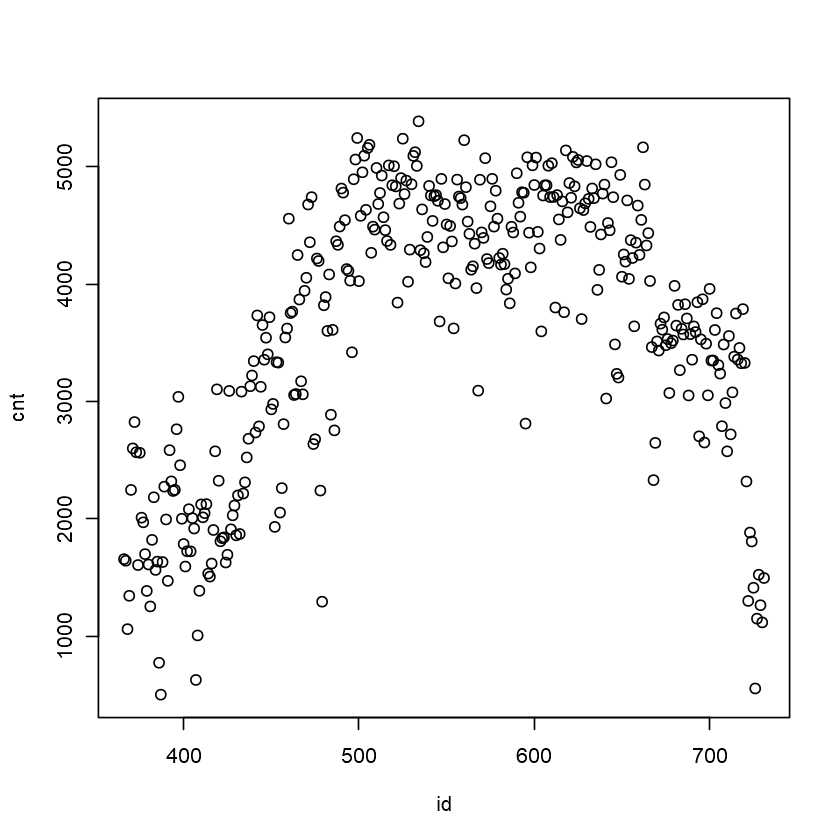

In [60]:


plot(real_test_sub)

In [61]:
write.csv(real_test_sub,"C:\\Users\\ytsat\\Documents\\DataScience\\ML\\Kaggle_Challenge\\XGBoost_v1.csv", row.names = FALSE)